In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import json
import math

import warnings
warnings.filterwarnings('ignore')

In [2]:
'''
Machine ID: S-226 
Start Time: 2025-12-09 23:51:57 
End Time: 2025-12-10 00:07:22 
Part Number: 5-965906-1 
Tool Number: S0025195
Variable: teil2GapY
'''

'\nMachine ID: S-226 \nStart Time: 2025-12-09 23:51:57 \nEnd Time: 2025-12-10 00:07:22 \nPart Number: 5-965906-1 \nTool Number: S0025195\nVariable: teil2GapY\n'

## Loading the data path

In [3]:
with open(r"E:\Learning\TEAI Cup\Data\Parquet Data\latest_data.json", "r") as f:
    latest_data = json.load(f)
    d1_path = latest_data['d1']
    d2_path = latest_data['d2']
    d3_path = latest_data['d3']

### Filtering the data according to the info given above to build the model

In [4]:
d2 = pd.read_parquet(d2_path)
d2.columns

Index(['machine_id', 'variable_name', 'value', 'timestamp', 'lowerLimit',
       'upperLimit', 'nominalValue', 'min', 'max', 'average', 'range',
       'outside_range_count', 'max_deviation'],
      dtype='object')

In [5]:
machine_id = "S-226"
start_time = "2025-12-09 23:51:57"
end_time = "2025-12-10 00:07:22"
part_number = "5-965906-1"
tool_number = "S0025195"
variable = "teil2GapY"

In [6]:
small_d2 = d2[(d2.machine_id == machine_id) & (d2.timestamp >= start_time) & (d2.timestamp <= end_time) & (d2.variable_name == variable)]
small_d2

,machine_id,variable_name,value,timestamp,lowerLimit,upperLimit,nominalValue,min,max,average,range,outside_range_count,max_deviation
2077709,S-226,teil2GapY,"0.4859,0.4817,0.4808,0.4802,0.4836,0.4861,0.47...",2025-12-09 23:51:57,-0.06,0.0,0.53,0.4748,0.5070,0.490656,0.0322,100.0,0.0552
2077785,S-226,teil2GapY,"0.4985,0.5027,0.4931,0.4937,0.4914,0.4945,0.49...",2025-12-09 23:52:03,-0.06,0.0,0.53,0.4774,0.5030,0.491839,0.0256,100.0,0.0526
2077854,S-226,teil2GapY,"0.4919,0.4917,0.4912,0.4828,0.4941,0.4883,0.48...",2025-12-09 23:52:11,-0.06,0.0,0.53,0.4815,0.5049,0.493700,0.0234,100.0,0.0485
2077955,S-226,teil2GapY,"0.4865,0.4867,0.4893,0.4784,0.488,0.4935,0.487...",2025-12-09 23:52:18,-0.06,0.0,0.53,0.4775,0.5032,0.489944,0.0257,100.0,0.0525
2078058,S-226,teil2GapY,"0.4934,0.4966,0.4966,0.4939,0.4988,0.5011,0.49...",2025-12-09 23:52:27,-0.06,0.0,0.53,0.4789,0.5054,0.491937,0.0265,100.0,0.0511
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086374,S-226,teil2GapY,"0.4928,0.497,0.4971,0.4955,0.4956,0.503,0.5014...",2025-12-10 00:06:46,-0.06,0.0,0.53,0.4790,0.5058,0.490925,0.0268,100.0,0.0510
2086447,S-226,teil2GapY,"0.4987,0.4938,0.4952,0.4937,0.4844,0.4842,0.48...",2025-12-10 00:06:54,-0.06,0.0,0.53,0.4799,0.5091,0.492630,0.0292,100.0,0.0501
2086517,S-226,teil2GapY,"0.4974,0.496,0.5062,0.4935,0.5013,0.5032,0.500...",2025-12-10 00:07:01,-0.06,0.0,0.53,0.4764,0.5102,0.491537,0.0338,100.0,0.0536
2086588,S-226,teil2GapY,"0.4907,0.4883,0.4876,0.4829,0.482,0.4919,0.494...",2025-12-10 00:07:10,-0.06,0.0,0.53,0.4767,0.5023,0.490260,0.0256,100.0,0.0533


## Trying DBSCAN

In [7]:
from sklearn.cluster import DBSCAN
# DBSCAN Clustering
X = small_d2[['average']].values
db = DBSCAN(eps=0.0009).fit(X)
labels = db.labels_

Text(0, 0.5, 'Avarage')

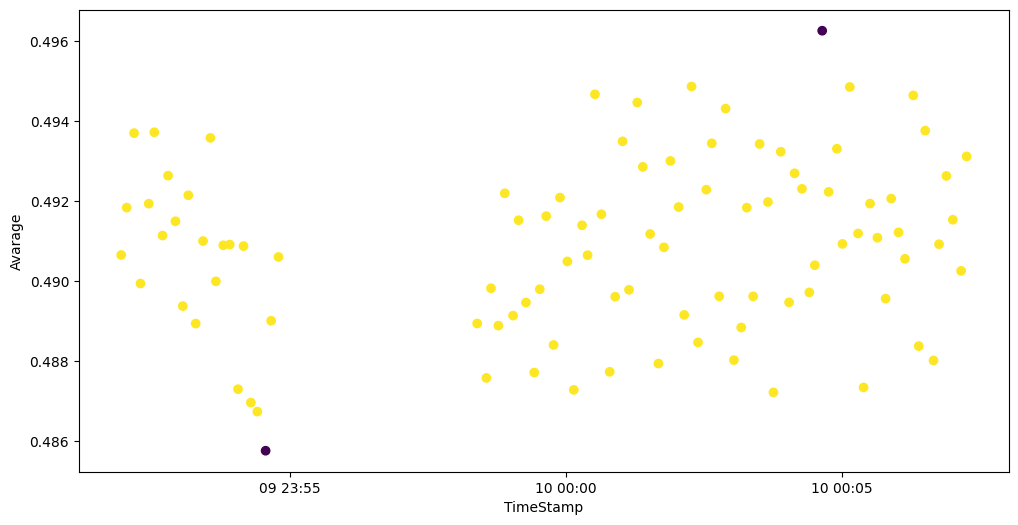

In [8]:
plt.figure(figsize=(12, 6))
plt.scatter(small_d2.timestamp, small_d2.average, c=labels, marker="o", label="Value")
plt.xlabel("TimeStamp")
plt.ylabel("Avarage")

## Trying Isolation Forest

In [9]:
from sklearn.ensemble import IsolationForest
# Isolation Forest for Anomaly Detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
small_d2['anomaly'] = iso_forest.fit_predict(X)
small_d2


,machine_id,variable_name,value,timestamp,lowerLimit,upperLimit,nominalValue,min,max,average,range,outside_range_count,max_deviation,anomaly
2077709,S-226,teil2GapY,"0.4859,0.4817,0.4808,0.4802,0.4836,0.4861,0.47...",2025-12-09 23:51:57,-0.06,0.0,0.53,0.4748,0.5070,0.490656,0.0322,100.0,0.0552,1
2077785,S-226,teil2GapY,"0.4985,0.5027,0.4931,0.4937,0.4914,0.4945,0.49...",2025-12-09 23:52:03,-0.06,0.0,0.53,0.4774,0.5030,0.491839,0.0256,100.0,0.0526,1
2077854,S-226,teil2GapY,"0.4919,0.4917,0.4912,0.4828,0.4941,0.4883,0.48...",2025-12-09 23:52:11,-0.06,0.0,0.53,0.4815,0.5049,0.493700,0.0234,100.0,0.0485,1
2077955,S-226,teil2GapY,"0.4865,0.4867,0.4893,0.4784,0.488,0.4935,0.487...",2025-12-09 23:52:18,-0.06,0.0,0.53,0.4775,0.5032,0.489944,0.0257,100.0,0.0525,1
2078058,S-226,teil2GapY,"0.4934,0.4966,0.4966,0.4939,0.4988,0.5011,0.49...",2025-12-09 23:52:27,-0.06,0.0,0.53,0.4789,0.5054,0.491937,0.0265,100.0,0.0511,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086374,S-226,teil2GapY,"0.4928,0.497,0.4971,0.4955,0.4956,0.503,0.5014...",2025-12-10 00:06:46,-0.06,0.0,0.53,0.4790,0.5058,0.490925,0.0268,100.0,0.0510,1
2086447,S-226,teil2GapY,"0.4987,0.4938,0.4952,0.4937,0.4844,0.4842,0.48...",2025-12-10 00:06:54,-0.06,0.0,0.53,0.4799,0.5091,0.492630,0.0292,100.0,0.0501,1
2086517,S-226,teil2GapY,"0.4974,0.496,0.5062,0.4935,0.5013,0.5032,0.500...",2025-12-10 00:07:01,-0.06,0.0,0.53,0.4764,0.5102,0.491537,0.0338,100.0,0.0536,1
2086588,S-226,teil2GapY,"0.4907,0.4883,0.4876,0.4829,0.482,0.4919,0.494...",2025-12-10 00:07:10,-0.06,0.0,0.53,0.4767,0.5023,0.490260,0.0256,100.0,0.0533,1


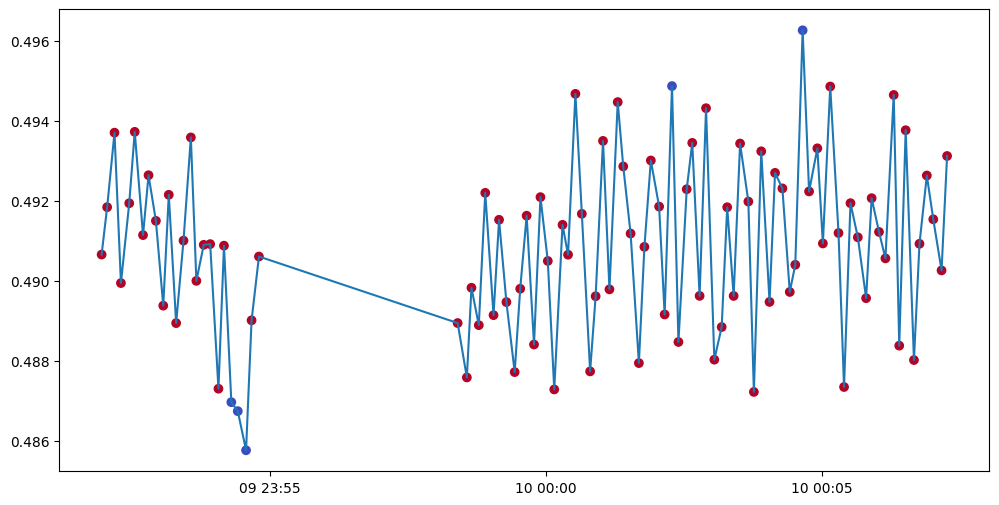

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(small_d2.timestamp, small_d2.average, label="Value")
plt.scatter(
    small_d2.timestamp,
    small_d2.average,
    c=small_d2["anomaly"],
    marker="o",
    label="Value",
    cmap="coolwarm",
)
